# Exploratory Data Analysis (EDA) Project  
***
Author: Kellie Leopold  
Purpose: This is an exploratory data analysis on the Iris dataset.  
Date: February 5th, 2025  

I will be the first to admit—I do not have a green thumb. At least two cactus plants have met their demise under my care, and right now, my biggest gardening challenge is keeping my cat from munching on my Jewel Orchid plant. While I may not be great at keeping vegetation alive, I can still dig into the data. Through this analysis of Iris flowers, I will uncover insights into the relationships between sepal and petal length and width across three different species.  

## 1. Imports  
  
* pandas
* Seaborn 
* matplotlib

In [316]:
import pandas as pd
import seaborn as sns
import matplotlib

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## 2. Load Data  
* Load the Iris dataset from the Seaborn Library.  
* Check the first few lines of data to ensure they loaded correctly.  

The output of the first few rows shows: five columns with numerical data in the first four columns and categorical data in the fifth.

In [317]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Initial Data Inspection  
* This dataset has 150 records of five attributes (sepal width, sepal lenght, petal width, petal length, and species) with well labeled columns.  
* The data types of the columns match with the expected data in that column.  
* There appears to be no missing values.

In [318]:
# Specify the number of rows to display
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 4. Initial Descriptive Statistics
This table contains a statistical summary of the numerical columns in the dataset.

In [319]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 5. Initial Data Distribution for Numerical Columns  
Histograms are used to visualize the relationship between the numerical data in sepal and petal length and width.

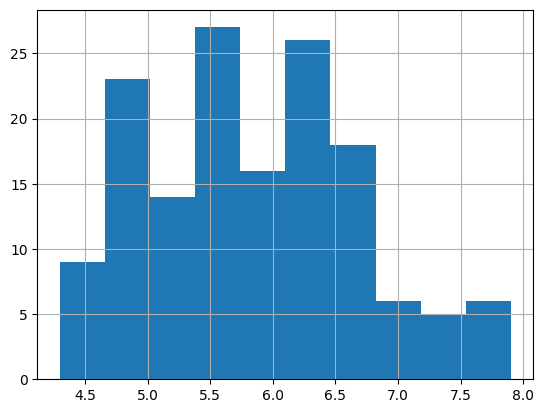

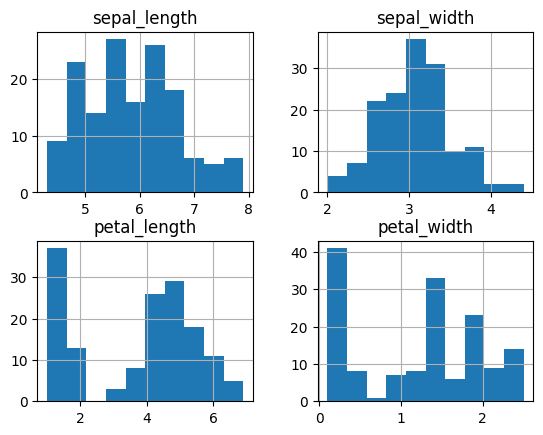

In [320]:
# Inspect histogram by one numerical column
iris_df['sepal_length'].hist()

# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
matplotlib.pyplot.show()

#### Observation #1 
* The first histogram shows only the data for the sepal lengths measured.  

* The remaining histograms show the varying lengths and widths of the sepals and petals measured.  

* It appears a larger sepal length and width typically equates to a smaller petal length and width and vice versa.

## Initial Data Distribution for Categorical Columns  
A histogram is used to count the number of records for each species in the dataset.

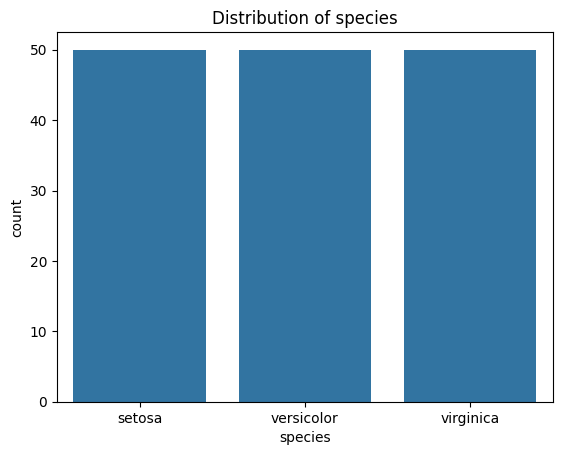

In [321]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
iris_df['species'].value_counts()

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

#### Observation #2  

* A histogram was created to show the record count for each Iris species in the species column, the only categorical column in the dataset.  

* There are an equal amount of records (50 each) for three species of Iris flower (setosa, versicolor, and virginica) in the dataset, a total of 150 records.   

## 6. Initial Data Transformation and Feature Engineering  
Column names have been capitalized, underscores have been replaced with spaces, and new column has been added to calculate the area from the sepal columns.

In [322]:
# Feature Engineering
# Renaming a column
iris_df.rename(columns={'sepal_length': 'Sepal Length', 'sepal_width': 'Sepal Width', 
                        'petal_length': 'Petal Length', 'petal_width': 'Petal Width'}, inplace=True)

# Adding a new column
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['Sepal Width']

## 7. Initial Visualizations  
A pairplot is used to show a grid of scatter plots that compare the data of the numerical columns for each species.

Then, a scatter plot is used to show the relationship between the sepal length and its area for each species.

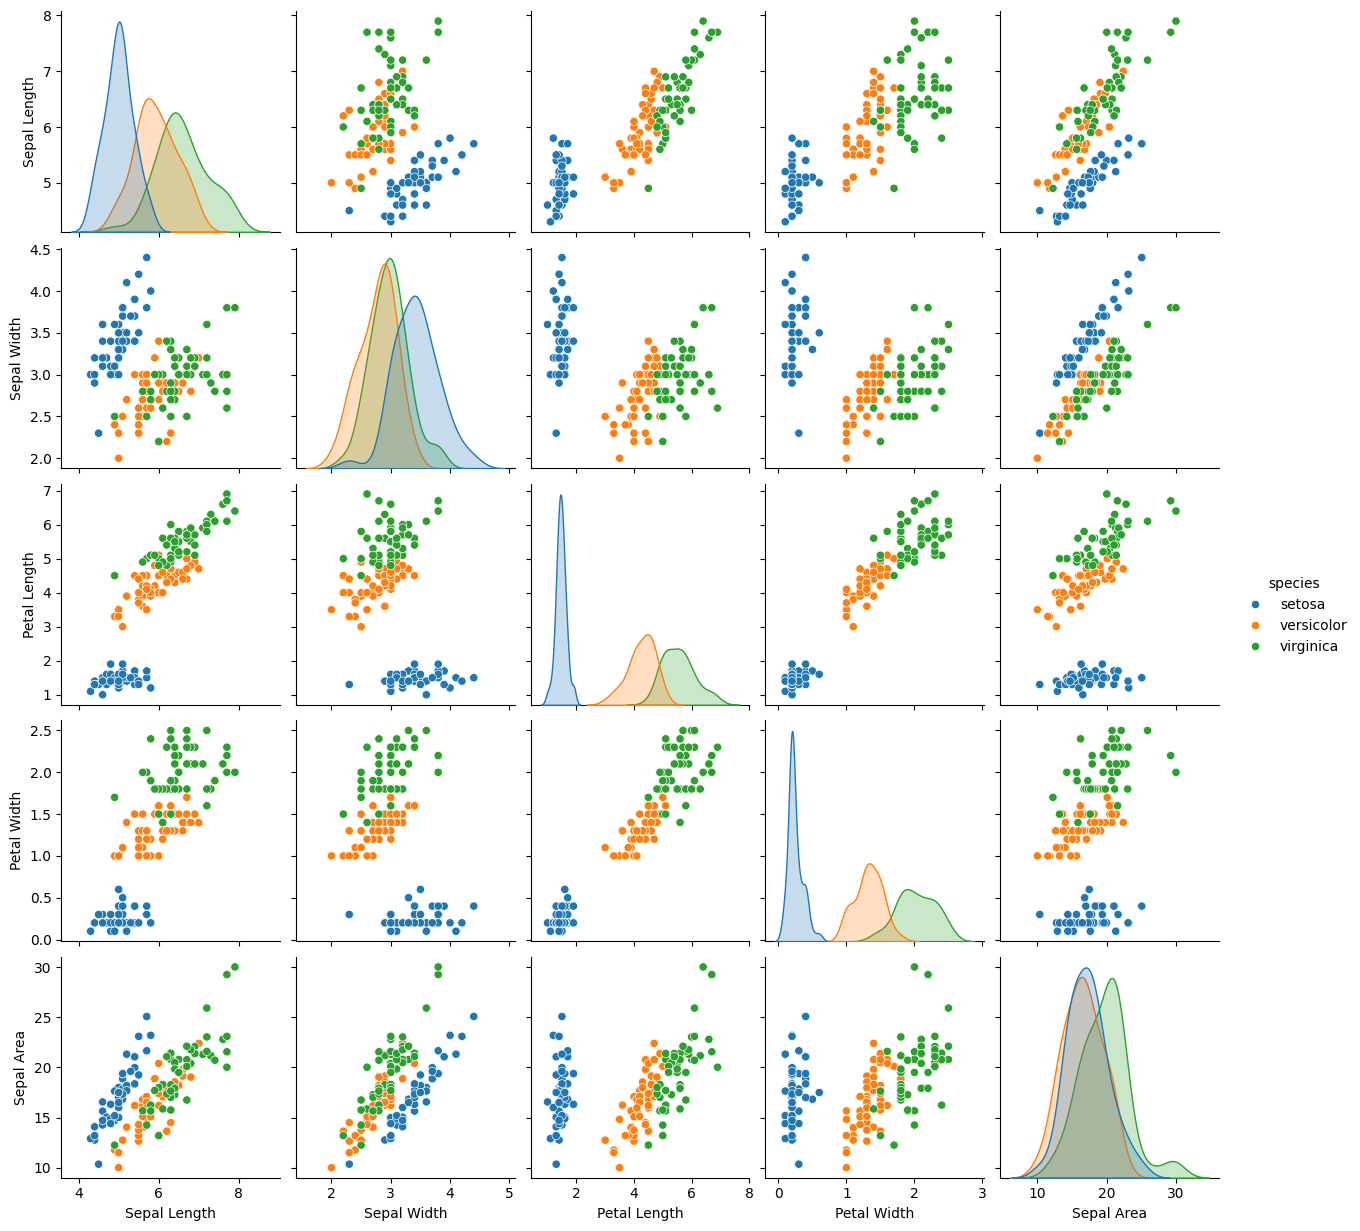

In [323]:
# Create a pairplot of the Iris dataset
# A pairplot is a grid of scatter plots for each pair of numerical columns in the dataset
# The hue parameter is used to color the data points 
# by species (a categorical column)
sns.pairplot(iris_df, hue='species')

# Show all plots
matplotlib.pyplot.show()

#### Observation #3  
* The grid makes it easy to see the relationship between each pair of numerical columns in the dataset.

* Versicolor and virginica are very similar to one another in all measured attributes and often overlap in their data.  

* Setosa tends to have lower sepal/petal length and width over all, but the sepal area is quite comperable to the other two species. 

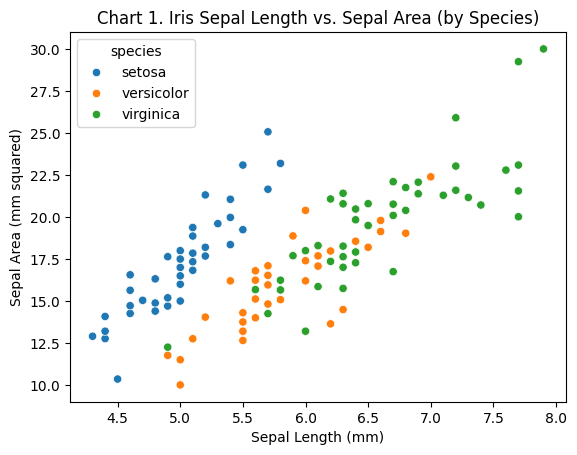

In [324]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: Axes = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal Area", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

matplotlib.pyplot.show()

#### Observation #4  
* Virginica has higher lengths and areas of all three species over all.

* Versicolor has one of the lowest areas of all three species, but both length and area increase at a rate similar to that of virginica.

* Setosa has one of the lowest lengths overall, but its area increases at a higher rate than the other two species. 

* For all three species, as length increases so does area.

## 8. Initial Insights
Though my gardening skills might leave much to be desired, the Iris dataset has certainly been interesting. Versicolor and virginica are practically data twins—growing at nearly the same rate and overlapping in nearly every attribute. The most noticeable distinction between the two lies in their petals. Setosa, on the other hand, marches to the beat of its own drum, sporting smaller petal lengths and larger sepal widths, but still surprising us with its rapid area growth. Overall, much like a plant spreading its roots as it grows, the dataset reveals a simple yet consistent trend: as length increases, so does area. So while I might not be cultivating a successful garden, I’m certainly cultivating data insights that tell a fascinating story about these Iris species.